### 4.3.10 Illusteration of linear damping with sinusoidal excitation

We now extend the previous example to also invole some external oscillating force on the system: $F(t) = Asin(\omega t)$. Driving a car on a road with sinusoidal bumps might give such an external excitation on the spring system in the car ($\omega$ is related to the velocity of the car).
With $A = 0.5$ and $\omega = 3$.

N_t: 5000


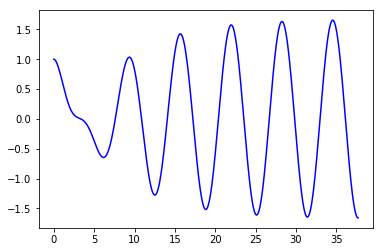

In [3]:
from math import pi, sin
import matplotlib.pyplot as plt

def EulerCromer(f, s, F, m, T, U_0, V_0, dt):
    from numpy import zeros, linspace
    N_t = int(round(T/dt))
    print('N_t:', N_t)
    t = linspace(0, N_t*dt, N_t+1)
    
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    
    # Initial condition
    u[0] = U_0
    v[0] = V_0
    
    # Step equations forward in time
    for n in range(N_t):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - f(v[n]) - s(u[n]))
        u[n+1] = u[n] + dt*v[n+1]
    return u, v, t

def linear_damping_sine_excitation():
    b = 0.3
    f = lambda v: b*v
    s = lambda u: k*u
    from math import pi, sin
    w = 3
    A = 0.5
    F = lambda t: A*sin(t)
    
    m = 1
    k = 1
    U_0 = 1
    V_0 = 0
    
    T = 12*pi
    dt = T/5000.
    
    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)

    index = int(len(u)*100/100.)
    plt.plot(t[-index:], u[-index:], 'b-')
    plt.show()

if __name__ == '__main__':
    linear_damping_sine_excitation()